# **3장 머신 러닝 핵심 알고리즘**
## **3.1 지도 학습**
### **3.1.1 K-최근접 이웃** 

예제 코드 : 붓꽃에 대한 분류

목표: 적절한 K 값 예측

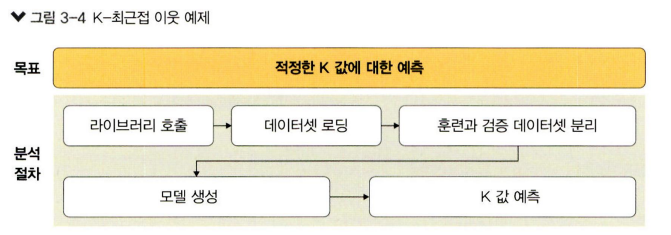

In [4]:
# 라이브러리 호출 및 데이터 준비

import numpy as np # 벡터 및 행렬의 연산 처리를 위한 라이브러리
import matplotlib.pyplot as plt # 데이터를 차트나 플롯으로 그려 주는 라이브러리
import pandas as pd # 데이터 분석 및 조작을 위한 라이브러리
from sklearn import metrics # 모델 성능 평가

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] # 데이터셋에 열 이름 할당당

dataset = pd.read_csv("C:\Euron\iris.data", names=names) # 데이터를 판다스 데이터프레임에 저장, 경로는 수정해서 진행행

In [ ]:
# 훈련과 테스트 데이터셋 분리

X = dataset.iloc[:,:-1].values # 모든 행을 사용하지만 열은 뒤에서 하나를 뺀 값을 가져와서 X에 저장
y = dataset.iloc[:,4].values # 모든 행을 사용하지만 열은 앞에서 다섯 번째 값만 가져와서 y에 저장

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링, 평균이 0, 표준편차가 1이 되도록 변환
X_train = s.fit_transform(X_train) # 훈련 데이터를 스케일링 처리
# 교재에서는 s.transform(X_train) 이라고 적혀 있는데 fit하지 않아서 오류가 발생하여 스스로 수정함함
X_test = s.transform(X_test) # 테스트 데이터를 스케일링 처리

In [7]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # k=50인 k-nearest neighbor 모델 생성
knn.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier(n_neighbors=50)

In [8]:
# 모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도 : {}".format(accuracy_score(y_test, y_pred)))

정확도 : 0.8


In [9]:
# 최적의 K 찾기
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1): # k는 1에서 10까지 값을 취함
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train) # for문을 반복하면서 k 값 변경
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1, "입니다")

정확도 0.9666666666666667 으로 최적의 k는 5 입니다


### **3.1.2 서포트 벡터 머신**
예제코드 : 붓꽆에 대한 분류


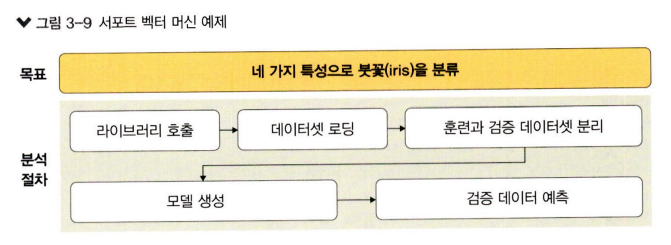

In [1]:
# 라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
# iris 데이터를 준비하고 훈련과 테스트 데이터셋으로 분리
iris = datasets.load_iris() #사이킷런에서 제공하는 iris데이터 호출출
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42) 
#사이킷런의 model_selection 패키지에서 제공하는 train_test_split 메거드를 활용하여 훈련과 테스트 데이터셋으로 분리리

In [4]:
# SVM 모델에 대한 정확도
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) 
# C값은 오류를 어느정도 허용할지 지정, C↑ => 하드마진, C↓ => 소프트마진
# gamma는 결정 경계를 얼마나 유연하게 가져갈지 지정(C와 비슷한 개념), gamma ↑ => 과적합 주의 
svm.fit(X_train, y_train) # 훈련 데이터를 사용하여 SVM 분류기를 훈련련
predictions = svm.predict(X_test) # 훈련된 모델을 사용하여 테스트 데이터에서 예측측
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:f}".format(score)) # 테스트 데이터 정확도 측정정

정확도: 0.988889


### **3.1.3 결정 트리**
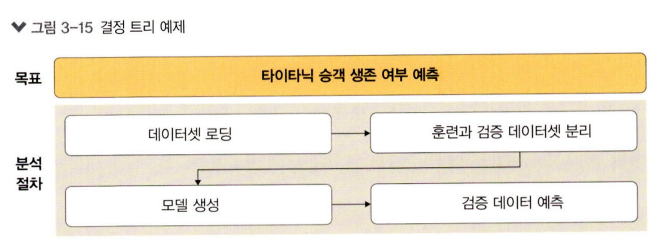

In [3]:
# 라이브러리 호출 및 데이터 준비
import pandas as pd
df = pd.read_csv(r"C:\Euron\titanic\train.csv", index_col='PassengerId') # 판다스를 이용하여 train.csv 파일을 로드해서 df에 저장장
print(df.head()) # train.csv 데이터의 상위 행 다섯 개 출력력

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [5]:
# 데이터 전처리
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male':0, 'female':1}) # 성별을 나타내는 'sex'를 0 또는 1의 정수 값으로 변환
df = df.dropna() # 값이 없는 데이터 삭제
X = df.drop('Survived', axis=1)
y = df['Survived'] # 'Survived' 값을 예측 레이블로 사용용

In [6]:
# 훈련과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [8]:
# 모델 훈련
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# 모델 예측
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 테스트 데이터에 대한 예측 결과를 보여줌줌

0.8100558659217877

In [10]:
# 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index= ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,95,17
True Survival,17,50


### **3.1.4 로지스틱 회귀와 선형 회귀**
로지스틱 선형 회귀



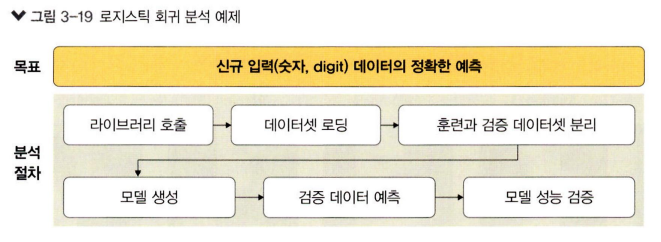

In [ ]:
# 라이브러리 호출 및 데이터 준비
from sklearn.datasets import load_digits
digits = load_digits() # 숫자 데이터셋은 사이킷런에서 제공공
print("Image Data Shape", digits.data.shape) # digits 데이터셋의 형태(이미지가 1797개 있으며 8*8 이미지의 64차원을 가짐짐)
print("Label Data Shape", digits.target.shape) #레이블(이미지의 숫자 정보보) 이미지 1797개 있음음

Image Data Shape (1797, 64)
Label Data Shape (1797,)


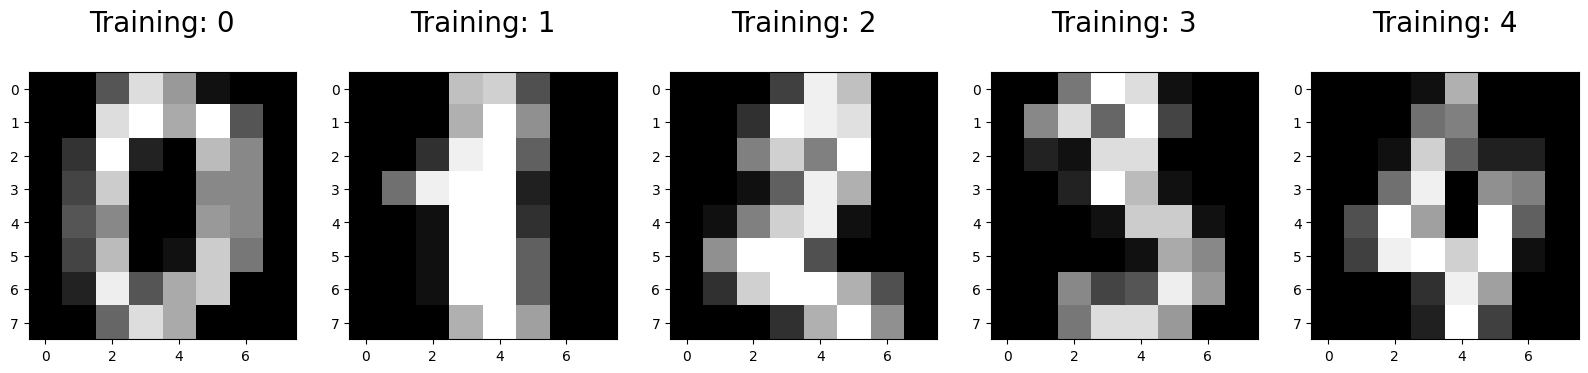

In [12]:
# digits 데이서셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): # 예시로 이미지 다섯 개만 확인인
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [13]:
# 훈련과 테스트 데이터셋 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스 생성성
logisticRegr.fit(X_train, y_train) # 모델 훈련련

c:\Users\Somang\anaconda3\envs\euron\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# 일부 데이터를 사용한 모델 예측
logisticRegr.predict(X_test[0].reshape(1, -1)) # 새로운 이미지(테스트 데이터)에 대한 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(X_test[0:10]) # 이미지 열 개에 대한 예측을 한 번에 배열로 출력력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [15]:
# 전체 데이터를 사용한 모델 예측
predictions = logisticRegr.predict(X_test) # 전체 데이터셋에 대한 예측
score = logisticRegr.score(X_test, y_test) # 스코어 메서드를 사용한 성능 측정정
print(score)

0.9511111111111111


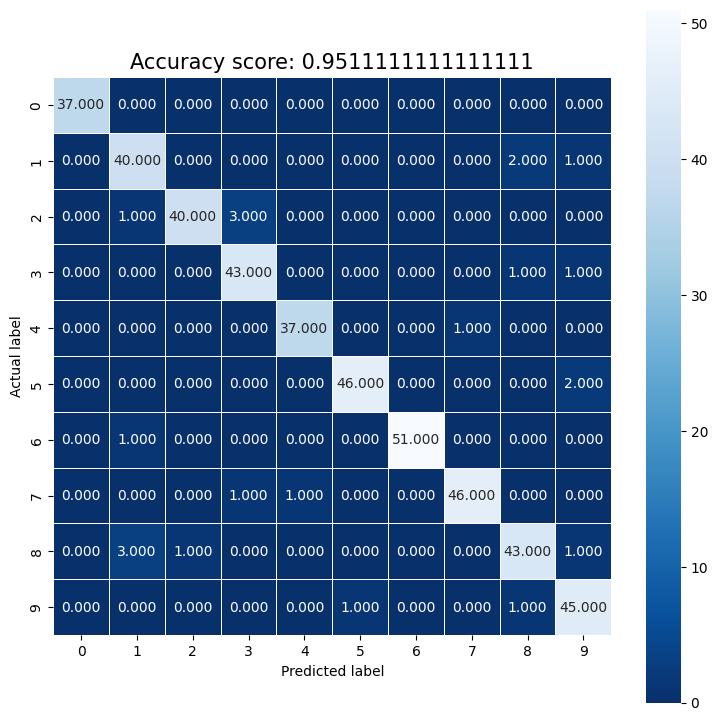

In [17]:
# 혼동 행렬 시각화 
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions) # 혼동 행렬렬
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r'); # heatmap으로 표현
plt.ylabel('Actual label'); # y축
plt.xlabel('Predicted label'); # x축축
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

선형 회귀


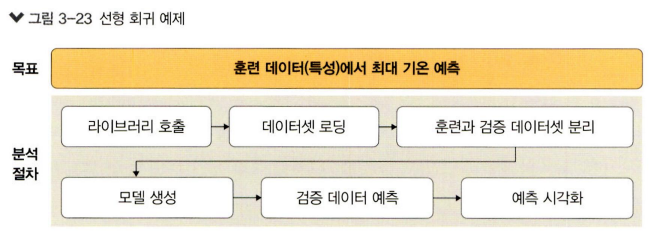

In [19]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
# weather.csv 파일 불러오기기
dataset = pd.read_csv("C:\Euron\weather.csv")

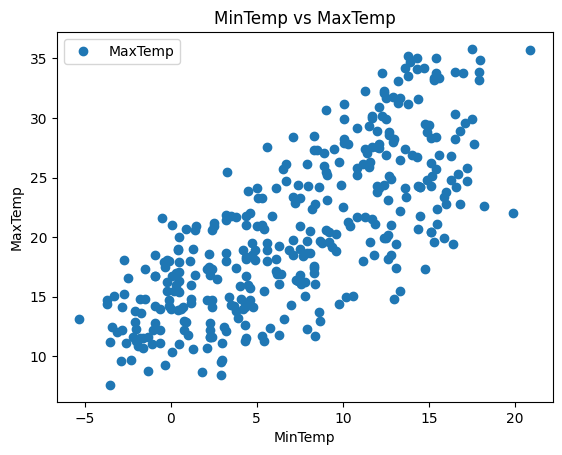

In [21]:
# 데이터 간 관계를 시각화로 표현
dataset.plot(x="MinTemp", y="MaxTemp", style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [22]:
# 데이터를 독립 변수와 종속 변수로 분리하고 선형 회귀 모델 생성
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MinTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# 회귀 모델에 대한 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.1,0.1
1,14.5,14.5
2,7.4,7.4
3,-3.7,-3.7
4,19.9,19.9
...,...,...
69,-1.0,-1.0
70,8.3,8.3
71,12.4,12.4
72,2.3,2.3


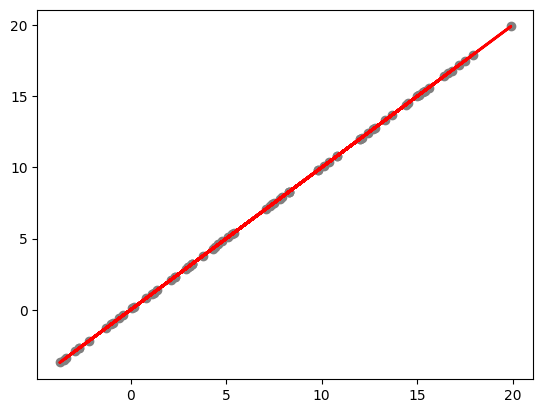

In [24]:
# 테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [26]:
# 선형 회귀 모델 평가
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 1.6292950912230743e-29
루트 평균제곱법 4.0364527635326965e-15


## **3.2 비지도 학습**
### **3.2.1 K-평균 군집화**


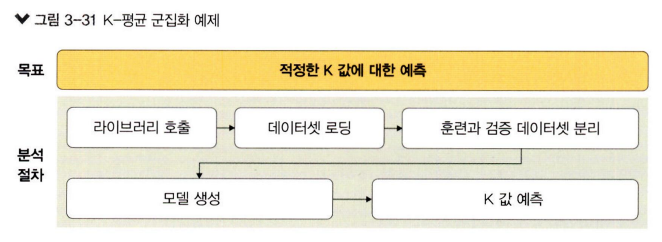

In [28]:
# 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [29]:
# 상품에 대한 연 지출 데이터 호출
data = pd.read_csv("C:\Euron\sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
# 연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region'] # 명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'] # 연속형 데이터터
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) # 명목형 데이터는 판다스의 get_dummies() 메서드를 사용하여 숫자(0,1)로 변환환
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [32]:
# 데이터 전처리
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

c:\Users\Somang\anaconda3\envs\euron\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Somang\anaconda3\envs\euron\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


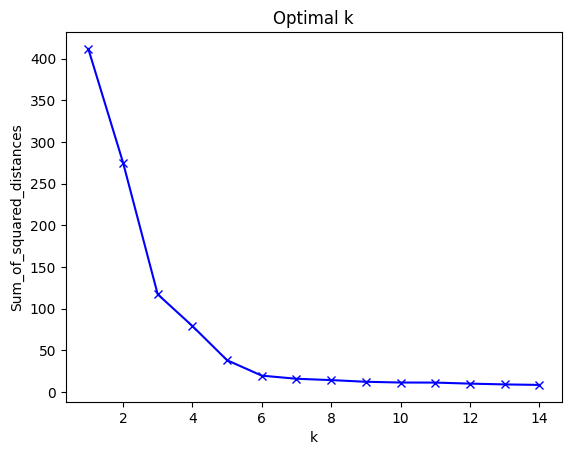

In [33]:
# 적당한 K 값 추출
Sum_of_squared_distances = []
K = range(1, 15) # k에 1부터 14까지 적용용
for k in K:
    km = KMeans(n_clusters=k) # k에 1~14까지 적용
    km = km.fit(data_transformed) # KMeans 모델 훈련련
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

### **3.2.3 주성분 분석(PCA)**


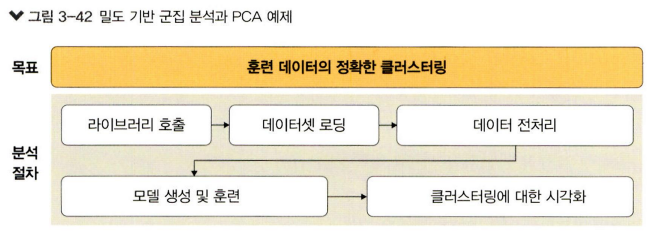

In [39]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA # 데이터 차원 축소소

In [ ]:
# 데이터 불러오기
X = pd.read_csv("C:\Euron\credit card.csv")
X = X.drop('CUST_ID', axis=1) # 불러온 데이터에서 'CUST_ID' 열을 삭제제
X.fillna(method='ffill', inplace=True) # 결측 값을 앞의 값으로 채울 때 사용용
print(X.head()) # 데이터셋 형태 확인

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

C:\Users\Somang\AppData\Local\Temp\ipykernel_28260\737741235.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [37]:
# 데이터 전처리 및 데이터를 2찬원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 평균이 0, 표준편차가 1이 되도록 데이터 크기를 조정

X_normalized = normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 넘파일 배열을 데이터프레임으로 변환

pca = PCA(n_components=2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


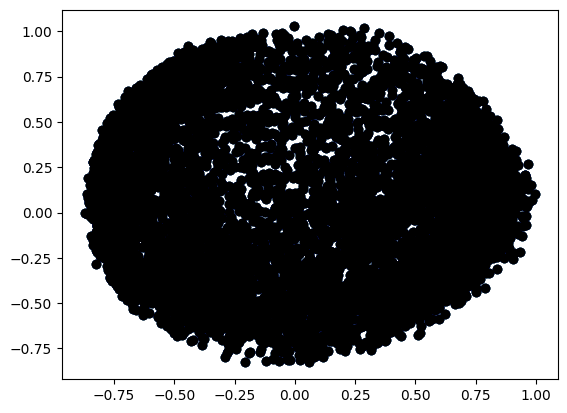

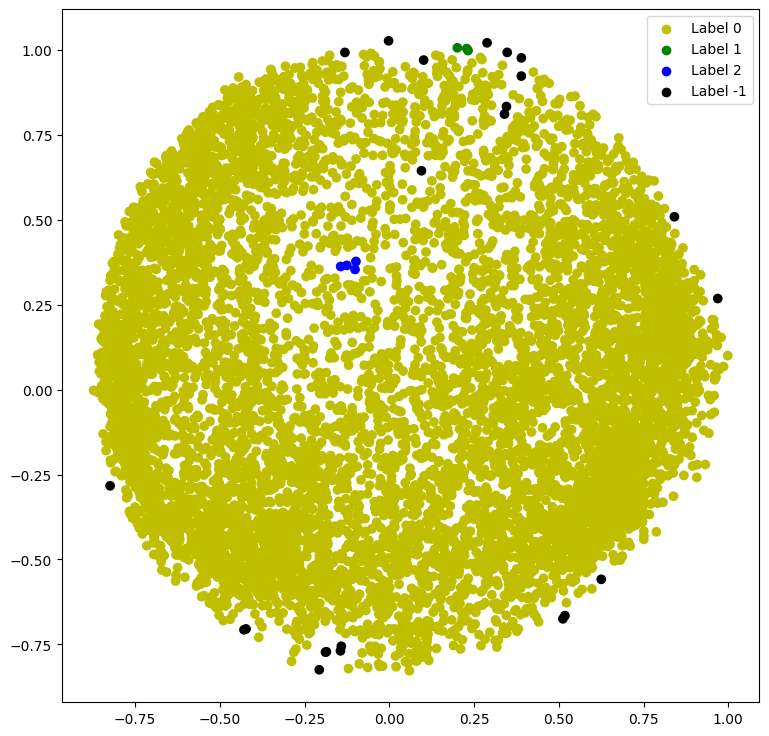

In [40]:
# DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal) #모델 생성 및 훈련

# min_samples 를 50에서 100으로 변경
#db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)

labels = db_default.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파이 배열을 labels에 저장

colours = {} # 츌력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] # 각 데이터 포인트에 대한 색상 벡터 생성성

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k'); # 플롯의 범례(legend) 구성

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) #정의된 색상 벡터에 따라 x축에 P1, y축에 P2 plot

plt.legend((r, g, b, k), ('Label 0', 'Label 1','Label 2','Label -1')) # 범례 구축축
plt.show()

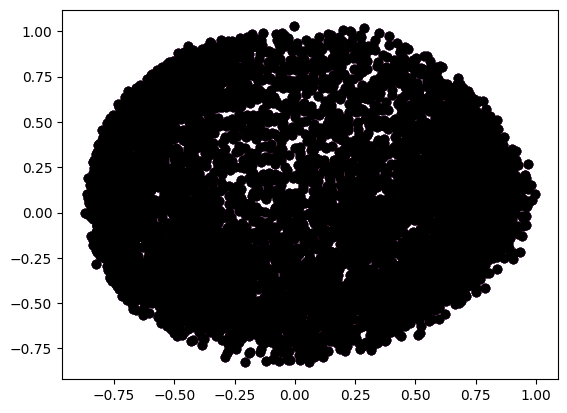

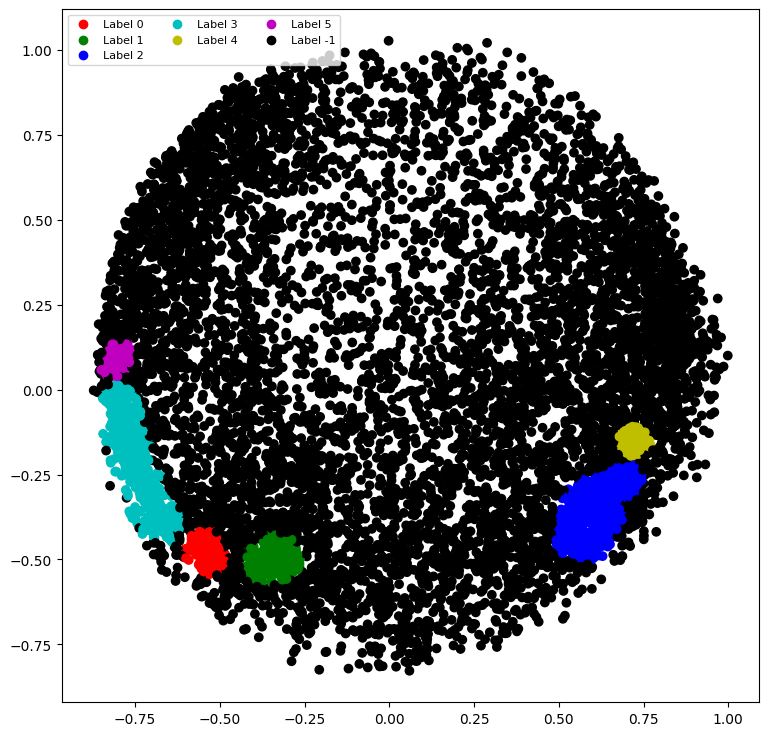

In [41]:
# 모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1','Label 2','Label 3','Label 4','Label 5','Label -1'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show() 

# **4장 딥러닝 시작**
## **4.2 딥러닝 구조**
### **4.2.1 딥러닝 용어**
렐루 함수와 소프트맥스 함수 구현

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.relu = torch.nn.Relu(inplace=True)
        self.out = torch.nn.Linear(n_hidden, n_output)
        self.softmax = torch.nn.Softmax(dim=n_output)
    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.out(x)
        x = self.softmax(x)
        return x

평균 제곱 오차

In [ ]:
import torch

loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)

크로스 엔트로피

In [ ]:
loss = nn.CrossEntropyLoss()
input = torch.randn(5,6, requires_grad =True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

### **4.2.3 딥러닝의 문제점과 해결 방안**
드롭아웃 구현

In [ ]:
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dopout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

미니 배치 경사 하강법 구현

In [ ]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y

dataset = CustomDataset()
dataloader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True
)

: 